In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, roc_auc_score, roc_curve 
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/mit13/Desktop/Bia 652 Multivariate/final project/healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(data.shape)
print(list(data.columns))

(5110, 12)
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [5]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [6]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [8]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning


In [11]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.groupby(['gender'])['bmi'].agg(['mean', 'median'])

,mean,median
gender,,
Female,29.065758,27.8
Male,28.647936,28.4
Other,22.400000,22.4


In [13]:
data.bmi[data.gender=='Female'] = data.bmi[data.gender=='Female'].fillna(27.8)
data.bmi[data.gender=='Male'] = data.bmi[data.gender=='Male'].fillna(28.4)
data.bmi[data.gender=='Other'] = data.bmi[data.gender=='Other'].fillna(22.4)

In [14]:
data = data.drop(axis = 1, columns='id')

In [15]:
for col in data.columns:
    print(data[col].value_counts())
    print("-"*15)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
---------------
0    4612
1     498
Name: hypertension, dtype: int64
---------------
0    4834
1     276
Name: heart_disease, dtype: int64
---------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------
93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09    1
197.58    1
99.91     1
60.50     1
Name: avg_glucose_level, Length: 3979, dtype: int64
---------------
28.4    142
27.8    120
28.7     41
27.7     37
26.1     37
       ..

In [16]:
data['smoking_status'].mode()

0    never smoked
dtype: object

In [17]:
data['smoking_status'].replace("Unknown", data['smoking_status'].mode().values[0], inplace = True)

In [18]:
data['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# Data Visualization


In [19]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862446,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699752,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324227,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158195,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.037138,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166926,0.131945
bmi,0.324227,0.158195,0.037138,0.166926,1.000000,0.036026
stroke,0.245257,0.127904,0.134914,0.131945,0.036026,1.000000


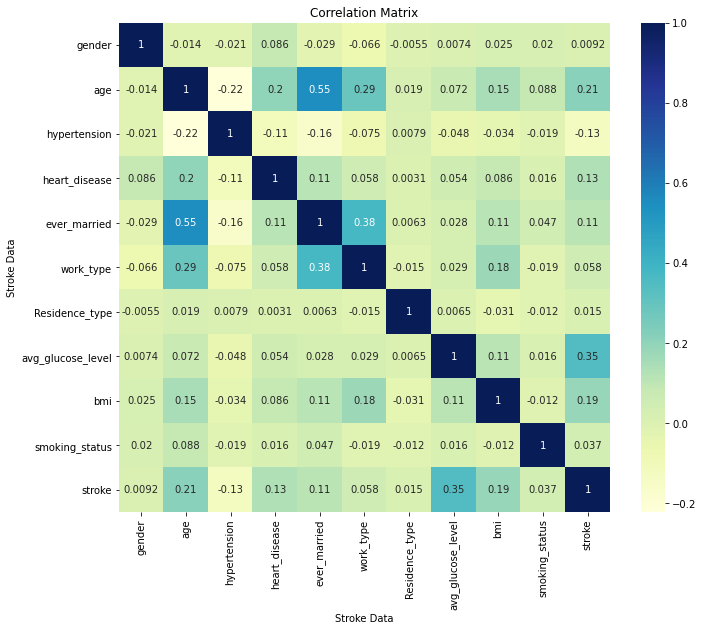

In [21]:
#converting catergorical data into numeric data and including them in correlation matrix
correlation_matrix = data.apply(lambda x: x.factorize()[0]).corr(method='pearson')
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.xlabel("Stroke Data")
plt.ylabel("Stroke Data")
plt.show()

In [22]:
correlation_matrix['stroke'].sort_values(ascending = False)

stroke               1.000000
avg_glucose_level    0.350555
age                  0.214024
bmi                  0.187914
heart_disease        0.134914
ever_married         0.108340
work_type            0.058224
smoking_status       0.037057
Residence_type       0.015458
gender               0.009200
hypertension        -0.127904
Name: stroke, dtype: float64

# Number of people affected by stroke

In [23]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [24]:
y = np.array(["Healthy People", "People who got stroke"])

Text(0.5, 1.0, 'Number of people affected by stroke')

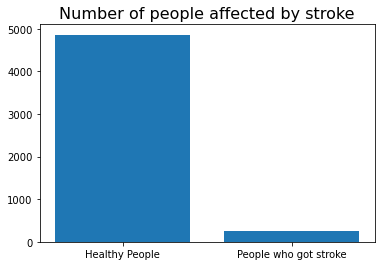

In [25]:
plt.bar(y, data['stroke'].value_counts().values)
plt.title('Number of people affected by stroke', fontsize = 16)

# Patients suffering from stroke by their smoking status


In [26]:
q = data.groupby('smoking_status')['stroke'].value_counts()

In [27]:
q

smoking_status   stroke
formerly smoked  0          815
                 1           70
never smoked     0         3299
                 1          137
smokes           0          747
                 1           42
Name: stroke, dtype: int64

In [28]:
x = ['formerly smoked', 'never smoked', 'smokes']
y = [(q['formerly smoked'][1] * 100) / (q['formerly smoked'][0] + q['formerly smoked'][1]), (q['never smoked'][1] * 100) / (q['never smoked'][0] + q['never smoked'][1]), (q['smokes'][1] * 100) / (q['smokes'][0] + q['smokes'][1])]

[Text(0.5, 0, 'Smoking_Status'), Text(0, 0.5, 'Percentage of patients')]

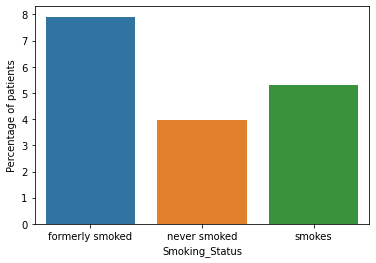

In [29]:
fig = sns.barplot(x, y)
fig.set(xlabel='Smoking_Status',ylabel='Percentage of patients')

# Patients suffering from stroke by gender

In [30]:
female_stroke = data.loc[(data.stroke == 1) & (data['gender'] == 'Female')]
number_of_female_stroke = female_stroke.value_counts().sum()
print('Number of females sufferring from a stroke:',number_of_female_stroke)

Number of females sufferring from a stroke: 141


In [31]:
male_stroke = data.loc[(data.stroke == 1) & (data['gender'] == 'Male')]
number_of_male_stroke = male_stroke.value_counts().sum()
print('Number of males suffering from a stroke:',number_of_male_stroke)

Number of males suffering from a stroke: 108


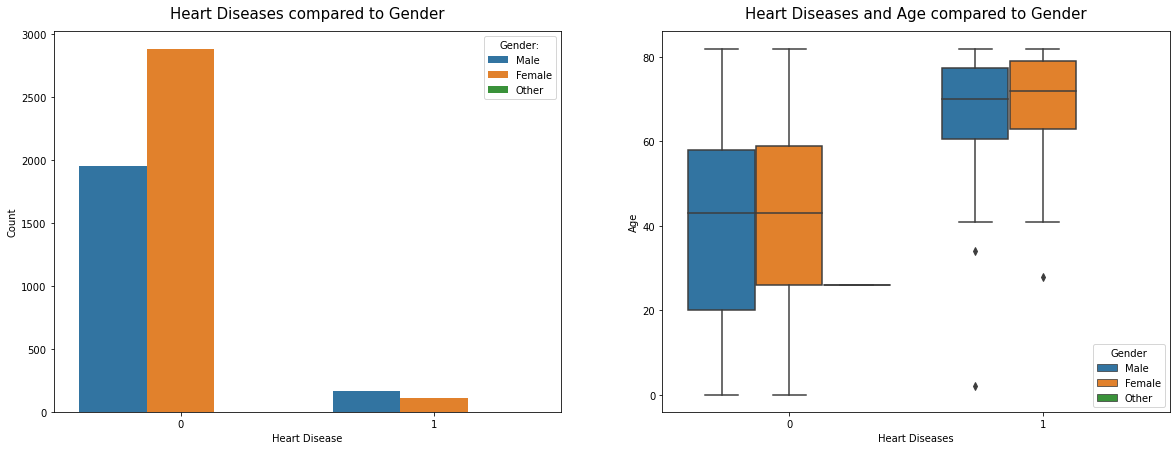

In [32]:
fig, ax= plt.subplots(1, 2, figsize=(20,7))

sns.countplot(x='heart_disease', hue='gender', data=data, ax=ax[0])
ax[0].set_title('Heart Diseases compared to Gender', size=15, pad=13)
ax[0].set_xlabel('Heart Disease')
ax[0].set_ylabel('Count')
ax[0].legend(loc='upper right',title='Gender:')


sns.boxplot(x='heart_disease',y='age', hue='gender', data=data, ax=ax[1])
ax[1].set_title('Heart Diseases and Age compared to Gender', size=15, pad=13)
ax[1].set_xlabel('Heart Diseases')
ax[1].set_ylabel('Age')
ax[1].legend(loc='lower right',title='Gender')

plt.show()

Text(0, 0.5, 'Count')

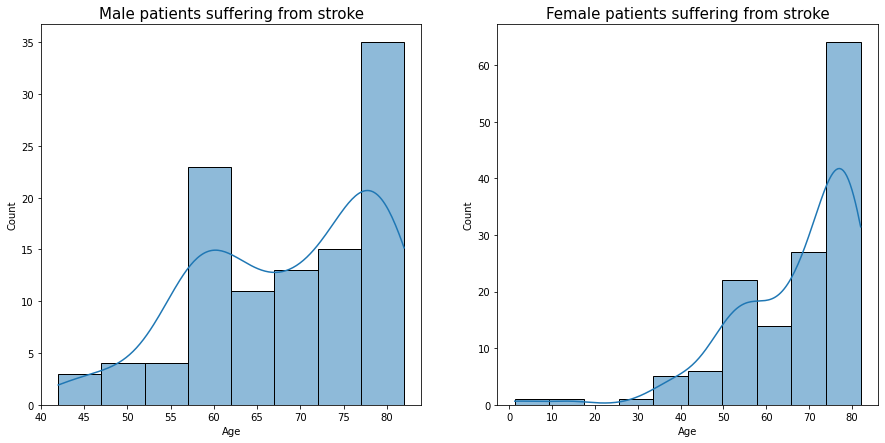

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.histplot(x='age',data=male_stroke, ax= ax[0],kde= True)
ax[0].set_title('Male patients suffering from stroke', fontsize = 15)
ax[0].set_xlabel('Age', size = 10)
ax[0].set_ylabel('Count',size = 10)

sns.histplot(x='age', data= female_stroke,ax=ax[1], kde= True )
ax[1].set_title('Female patients suffering from stroke', fontsize = 15)
ax[1].set_xlabel('Age',size=10)
ax[1].set_ylabel('Count',size=10)

In [35]:
X = data.drop(["stroke"], axis=1)
y = data["stroke"]

In [36]:
y = pd.DataFrame(y, columns=["stroke"])

In [37]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [38]:
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


# One hot encoding


In [39]:
cat_columns = X.select_dtypes("object")
X = pd.get_dummies(X, columns=cat_columns.columns)

In [40]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,202.21,27.8,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [59]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.154756
         Iterations: 35
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.205     
Dependent Variable:            stroke                     AIC:                        1613.6028 
Date:                          2021-12-01 12:04           BIC:                        1718.2261 
No. Observations:              5110                       Log-Likelihood:             -790.80   
Df Model:                      15                         LL-Null:                    -995.19   
Df Residuals:                  5094                       LLR p-value:                9.9201e-78
Converged:                     0.0000                     Scale:                      1.0000    
No. Iterations:                35.0000                                                          
------------------------------------------------------------------------------------------------
     

C:\Users\mit13\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
cols_to_keep =['hypertension','avg_glucose_level','age']
X1 = data[cols_to_keep]
Y1 = data['stroke']


# Oversampling Data


In [102]:
sm = SMOTE()
X_s, y_s= sm.fit_resample(X1, Y1)

# Splitting the data into train and test set

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=10,stratify=y_s)

x_train.shape, y_train.shape

((7777, 1), (7777,))

# Standardization of Data


In [104]:
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

Logistic regression

In [105]:
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)
print(f"Train Accuracy.: {reg.score(x_train_scaled, y_train)*100:.2f}%")
print(f"Test Accuracy.: {reg.score(x_test_scaled, y_test)*100:.2f}%")

Train Accuracy.: 76.15%
Test Accuracy.: 73.21%


In [69]:
y_pred = reg.predict(x_test_scaled)

In [70]:
c_m = confusion_matrix(y_test, y_pred)

In [71]:
c_m

array([[699, 273],
       [165, 808]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       972
           1       0.75      0.83      0.79       973

    accuracy                           0.77      1945
   macro avg       0.78      0.77      0.77      1945
weighted avg       0.78      0.77      0.77      1945



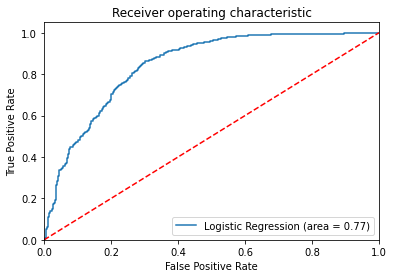

In [73]:
logit_roc_auc = roc_auc_score(y_test, reg.predict(x_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(x_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()